In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           6333        198  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts            McDonald's India : Menu Nutrition Dataset             5KB  2022-07-28 17:08:52           5101        180  0.9411765        
arianazmoudeh/airbnbopendata                                   Airbnb Open Data                                     10MB  2022-08-01 15:58:10           3295         99  0.9705882        
iamsouravbanerjee/world-populat

In [4]:
!kaggle datasets download -d wordsforthewise/lending-club
!unzip /content/lending-club.zip

 99% 1.25G/1.26G [00:06<00:00, 209MB/s]
100% 1.26G/1.26G [00:06<00:00, 220MB/s]
Archive:  /content/lending-club.zip
  inflating: accepted_2007_to_2018Q4.csv.gz  
  inflating: accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv  
  inflating: rejected_2007_to_2018Q4.csv.gz  
  inflating: rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv  


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [6]:
import pandas as pd
import random
from matplotlib import pyplot as plt

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

import seaborn as sns
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler


import pandas as pd

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

# Load Dataset


In [8]:
loan = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [10]:
loans = loan[['loan_amnt', 'term','int_rate', 'sub_grade','emp_title',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl']]

In [11]:
loans.head()

,loan_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl
0,3600.0,36 months,13.99,C4,leadman,10+ years,MORTGAGE,55000.0,Fully Paid,PA,5.91,4.0,29.7,1506.0,37.2,4.0
1,24700.0,36 months,11.99,C1,Engineer,10+ years,MORTGAGE,65000.0,Fully Paid,SD,16.06,0.0,19.2,57830.0,27.1,20.0
2,20000.0,60 months,10.78,B4,truck driver,10+ years,MORTGAGE,63000.0,Fully Paid,IL,10.78,10.0,56.2,2737.0,55.9,4.0
3,35000.0,60 months,14.85,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Current,NJ,17.06,NaN,11.6,54962.0,12.1,10.0
4,10400.0,60 months,22.45,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Fully Paid,PA,25.37,1.0,64.5,4567.0,77.5,7.0


In [12]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [13]:
loans.describe()

,loan_amnt,int_rate,annual_inc,dti,mths_since_recent_inq,revol_util,bc_open_to_buy,bc_util,num_op_rev_tl
count,2260668,2260668,2260664,2258957,1965233,2258866,2185733,2184597,2190392
mean,15047,13,77992,19,7,50,11394,58,8
std,9190,5,112696,14,6,25,16600,29,5
min,500,5,0,-1,0,0,0,0,0
25%,8000,9,46000,12,2,32,1722,35,5
50%,12900,13,65000,18,5,50,5442,60,7
75%,20000,16,93000,24,11,69,14187,83,10
max,40000,31,110000000,999,25,892,711140,340,91


# Missing data

In [14]:
loans.isnull().sum()

loan_amnt                    33
term                         33
int_rate                     33
sub_grade                    33
emp_title                167002
emp_length               146940
home_ownership               33
annual_inc                   37
loan_status                  33
addr_state                   33
dti                        1744
mths_since_recent_inq    295468
revol_util                 1835
bc_open_to_buy            74968
bc_util                   76104
num_op_rev_tl             70309
dtype: int64

In [15]:
missing_data = pd.DataFrame({'total_missing': loans.isnull().sum(), '%_missing': 
(loans.isnull().sum()/2260701)*100})
missing_data

,total_missing,%_missing
loan_amnt,33,0
term,33,0
int_rate,33,0
sub_grade,33,0
emp_title,167002,7
emp_length,146940,6
home_ownership,33,0
annual_inc,37,0
loan_status,33,0
addr_state,33,0


In [16]:
loans = loans.dropna()
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787734 entries, 0 to 2260698
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   loan_amnt              float64
 1   term                   object 
 2   int_rate               float64
 3   sub_grade              object 
 4   emp_title              object 
 5   emp_length             object 
 6   home_ownership         object 
 7   annual_inc             float64
 8   loan_status            object 
 9   addr_state             object 
 10  dti                    float64
 11  mths_since_recent_inq  float64
 12  revol_util             float64
 13  bc_open_to_buy         float64
 14  bc_util                float64
 15  num_op_rev_tl          float64
dtypes: float64(9), object(7)
memory usage: 231.9+ MB


In [17]:
missing_data = pd.DataFrame({'total_missing': loans.isnull().sum()})
missing_data

,total_missing
loan_amnt,0
term,0
int_rate,0
sub_grade,0
emp_title,0
emp_length,0
home_ownership,0
annual_inc,0
loan_status,0
addr_state,0


# Dealing with outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ffea945d0>,
      dtype=object)

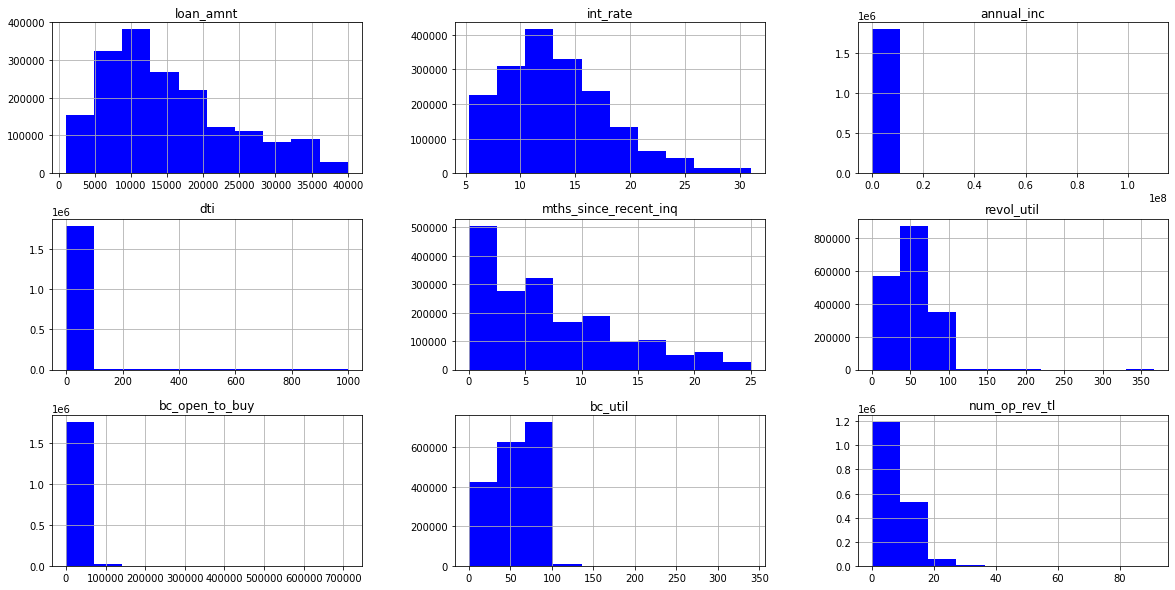

In [18]:
loans.hist(bins = 10, figsize = (20,10), color = 'b')

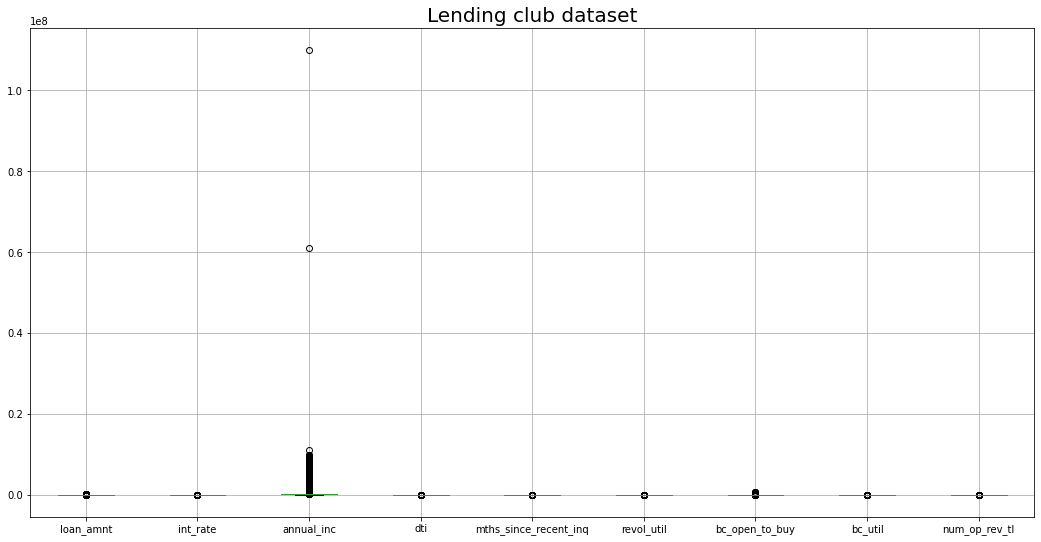

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
num_cols = ['loan_amnt', 'term','int_rate', 'sub_grade',
                  'emp_length','home_ownership', 'annual_inc', 'loan_status', 'addr_state',
                  'dti','mths_since_recent_inq', 'revol_util', 'bc_open_to_buy', 'bc_util', 'num_op_rev_tl' ]
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Lending club dataset", fontsize=20)
plt.show()

In [20]:
loans.annual_inc.describe()

count     1787734
mean        81316
std        121941
min             0
25%         50000
50%         69000
75%         96000
max     110000000
Name: annual_inc, dtype: float64

In [21]:
loans.annual_inc.unique()

array([ 55000.,  65000.,  63000., ..., 136799., 131209., 180792.])

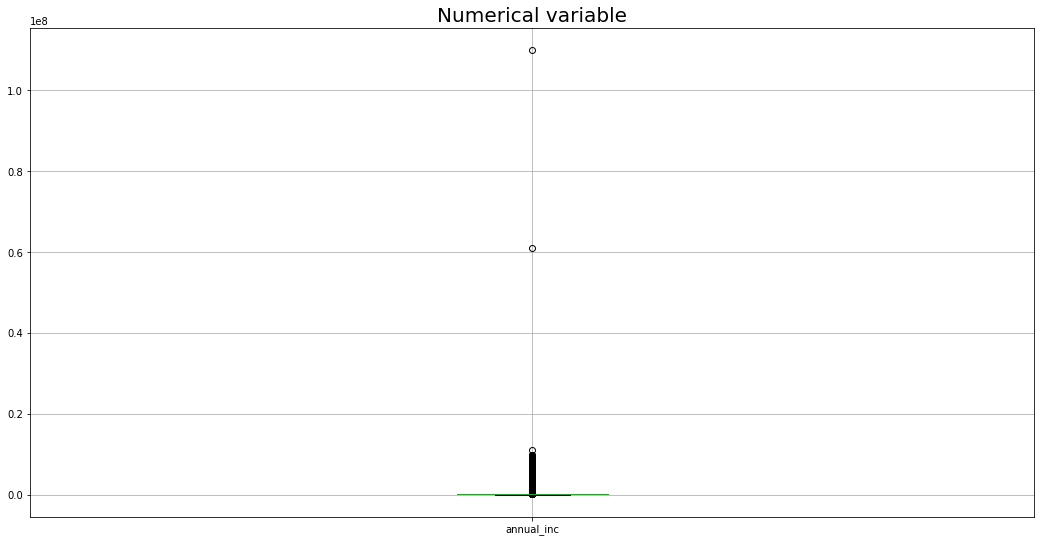

In [22]:
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

In [23]:
#remove outlier "annual income"
q_low = loans["annual_inc"].quantile(0.08)
q_hi  = loans["annual_inc"].quantile(0.92)

loans = loans[(loans["annual_inc"] < q_hi) & (loans["annual_inc"] > q_low)]

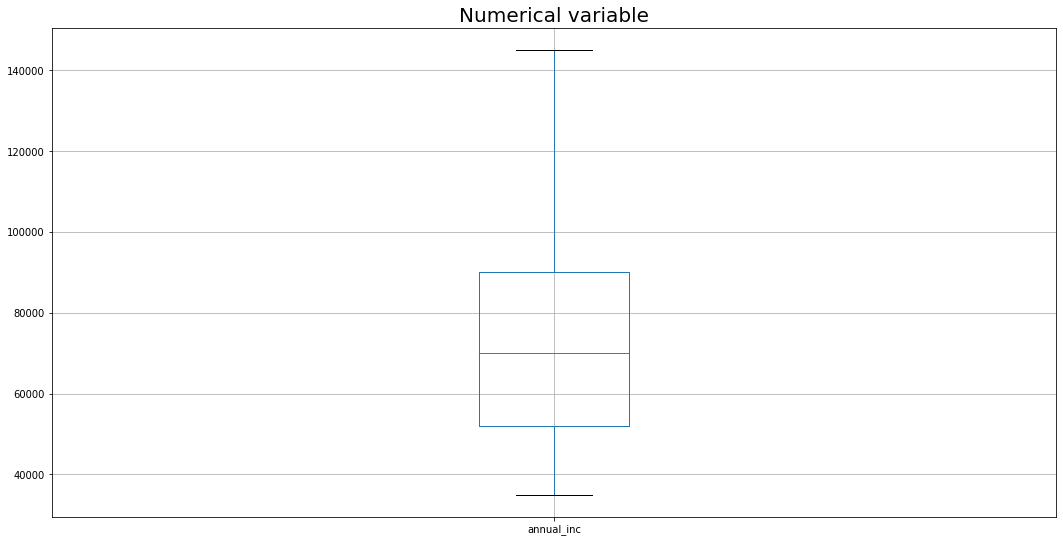

In [24]:
# plot a chart to view to what extend outliers are removed
num_cols = ['annual_inc']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.title("Numerical variable", fontsize=20)
plt.show()

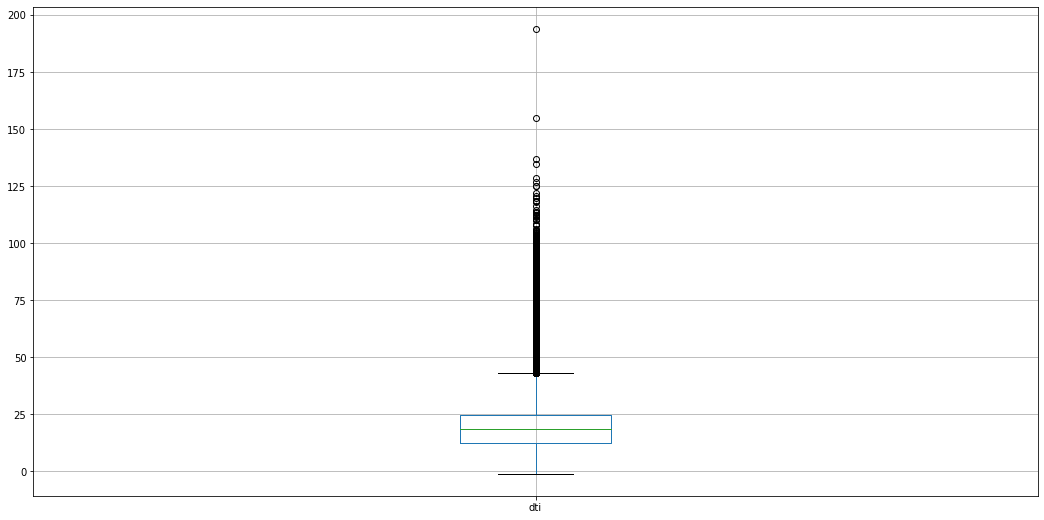

In [25]:
num_cols = ['dti']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [26]:
#remove outlier 

loans = loans[(loans['dti'] <=45)]

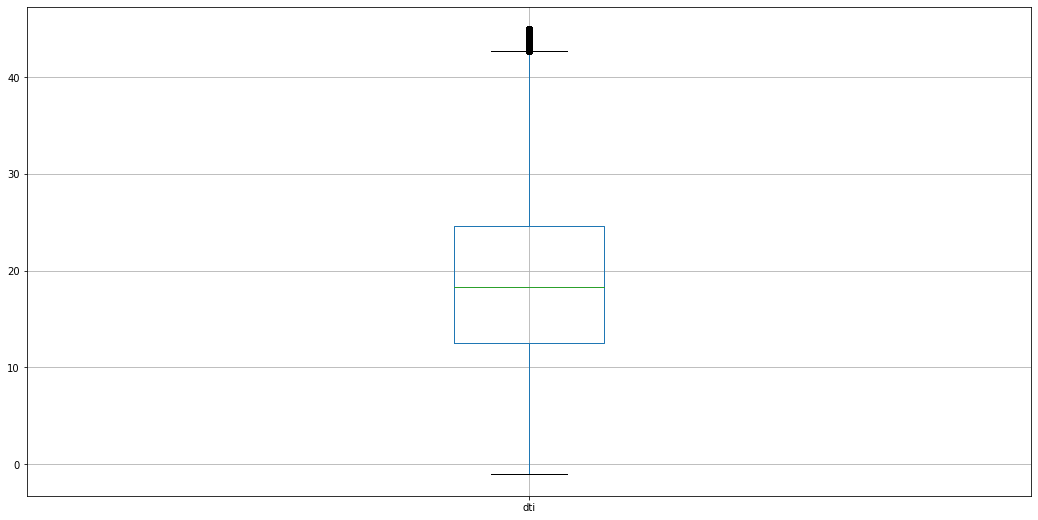

In [27]:
num_cols = ['dti']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ff8463610>,
      dtype=object)

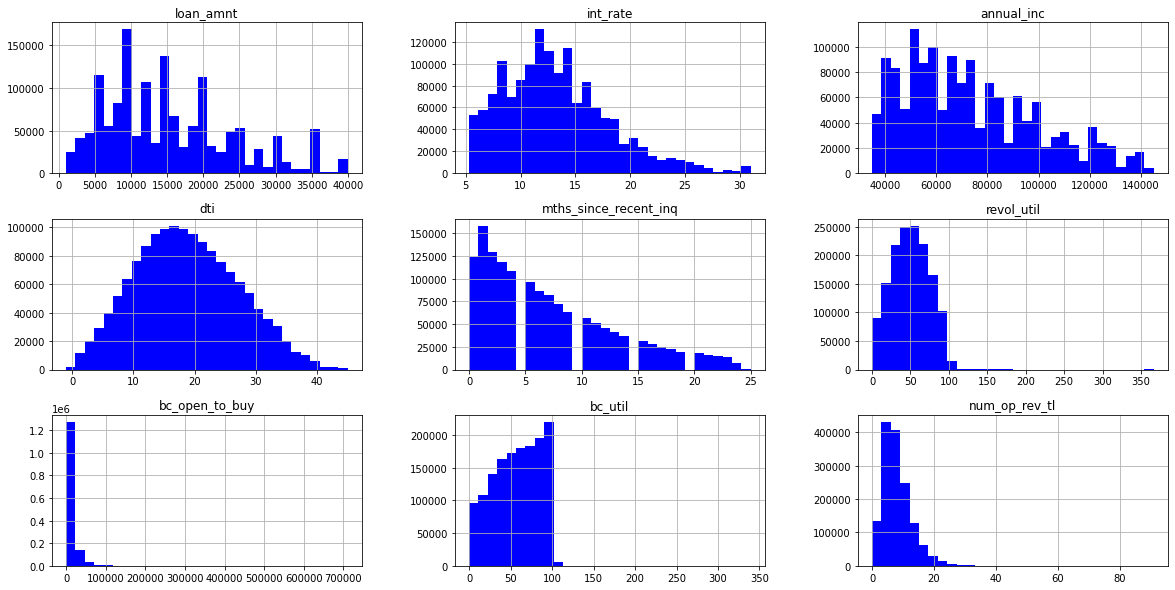

In [28]:
loans.hist(bins = 30, figsize = (20,10), color = 'b')

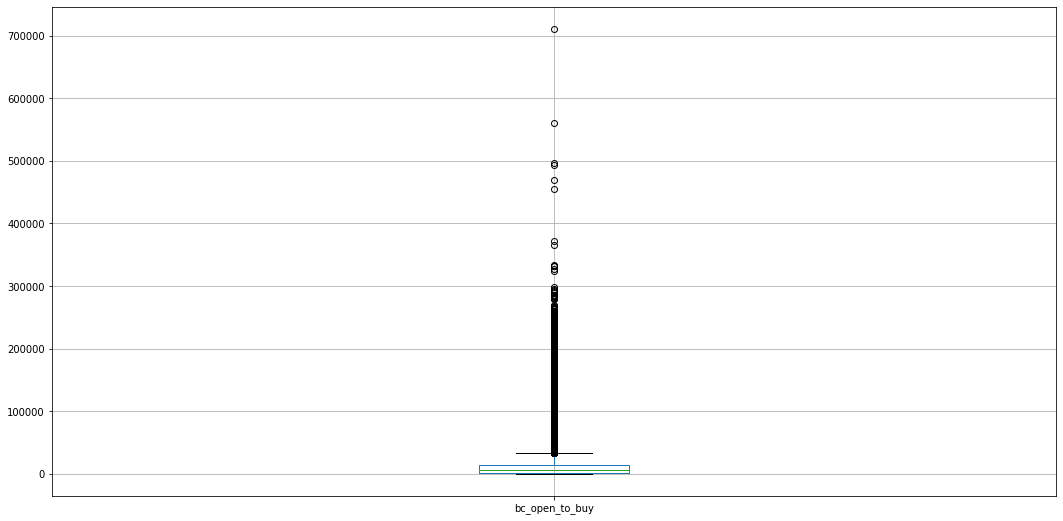

In [29]:
num_cols = ['bc_open_to_buy']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [30]:
#remove outlier 
q_hi  = loans['bc_open_to_buy'].quantile(0.95)
loans = loans[(loans['bc_open_to_buy'] < q_hi)]

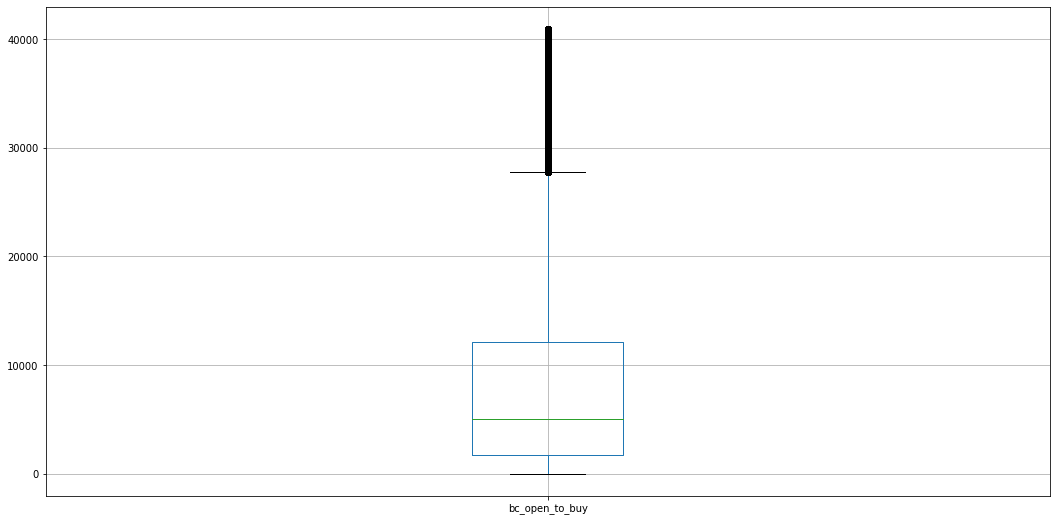

In [31]:
num_cols = ['bc_open_to_buy']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe8d17a10>,
      dtype=object)

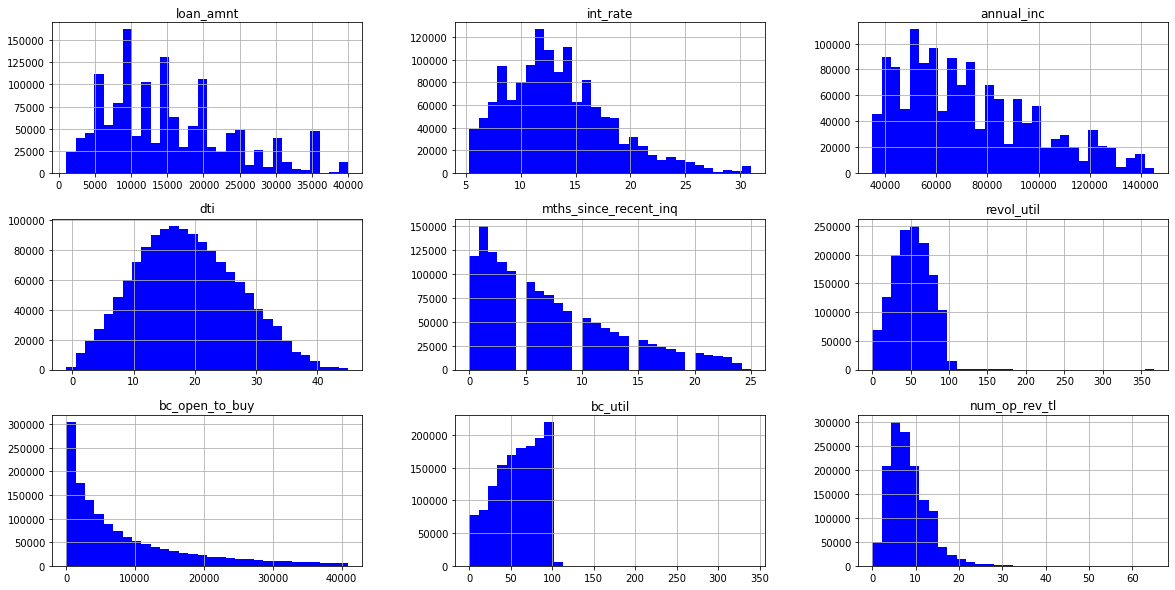

In [32]:
loans.hist(bins = 30, figsize = (20,10), color = 'b')

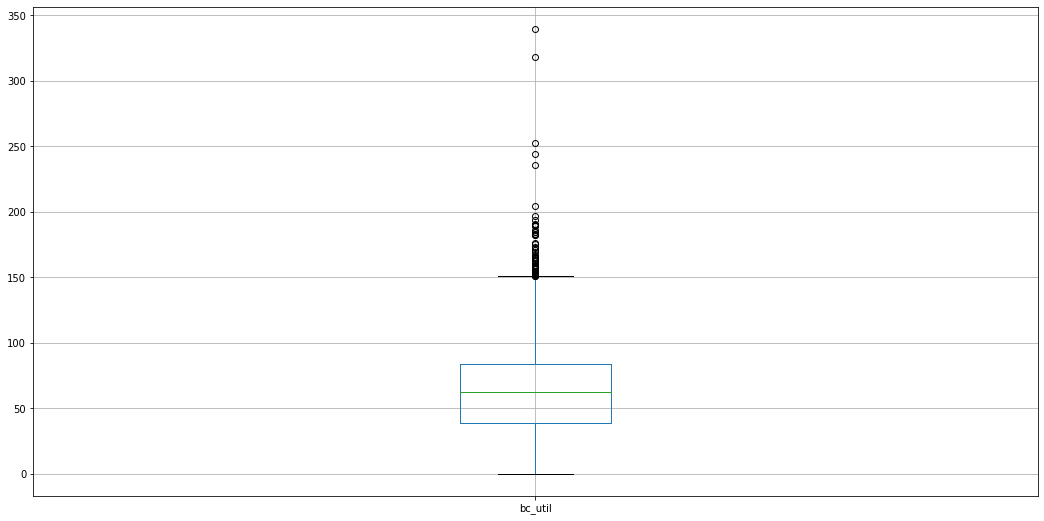

In [33]:
num_cols = ['bc_util']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [34]:

#remove outlier 

loans = loans[(loans['bc_util'] <=160)]

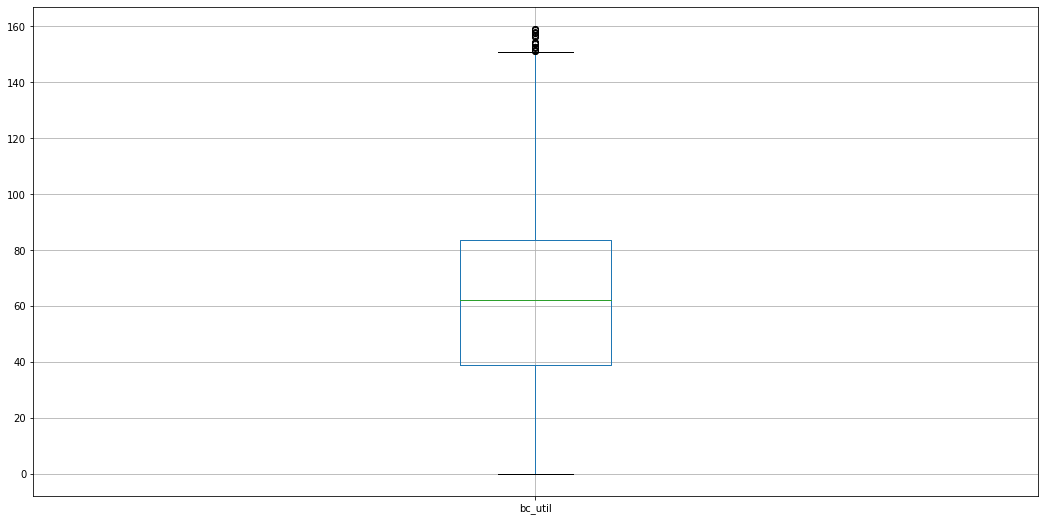

In [35]:
num_cols = ['bc_util']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

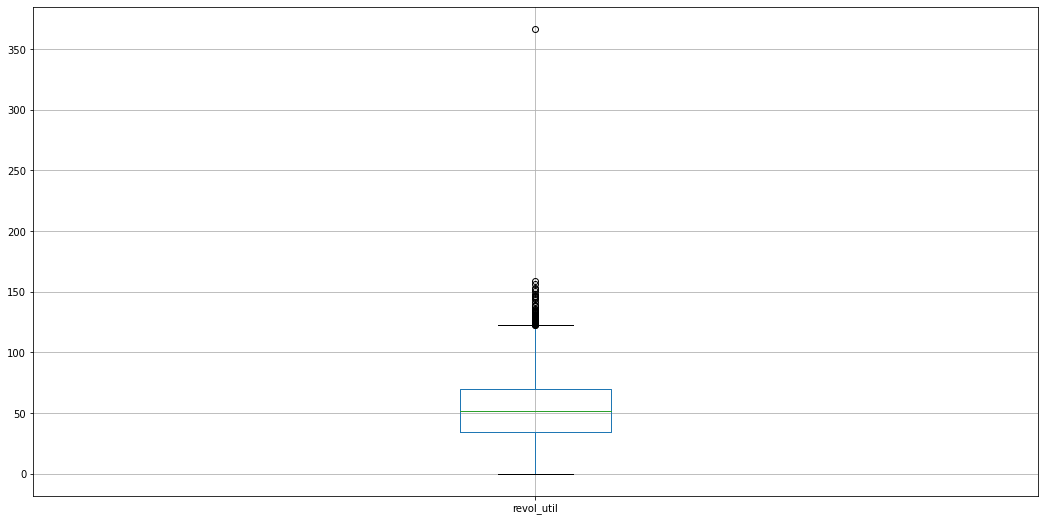

In [36]:
num_cols = ['revol_util']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [37]:
#remove outlier 
loans = loans[(loans['revol_util'] <=150)]

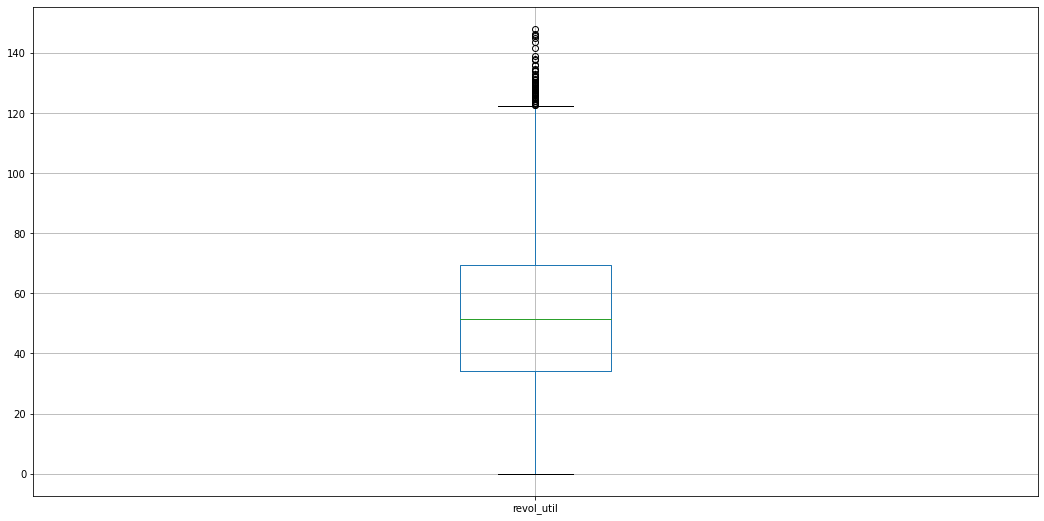

In [38]:
num_cols = ['revol_util']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()


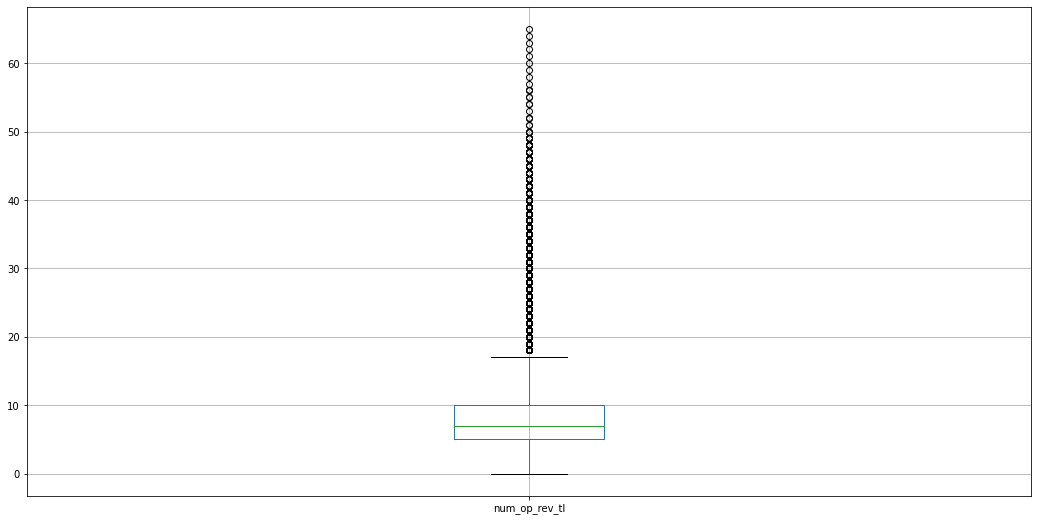

In [39]:
num_cols = ['num_op_rev_tl']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

In [40]:
#remove outlier
loans = loans[(loans['num_op_rev_tl'] <=35)]

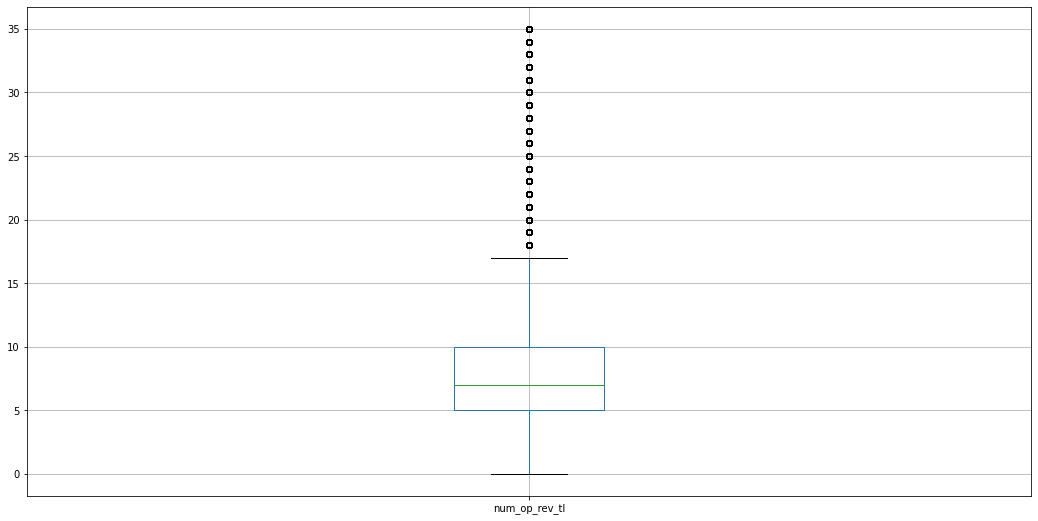

In [41]:
num_cols = ['num_op_rev_tl']
plt.figure(figsize=(18,9))
loans[num_cols].boxplot()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fe7e0cc50>,
      dtype=object)

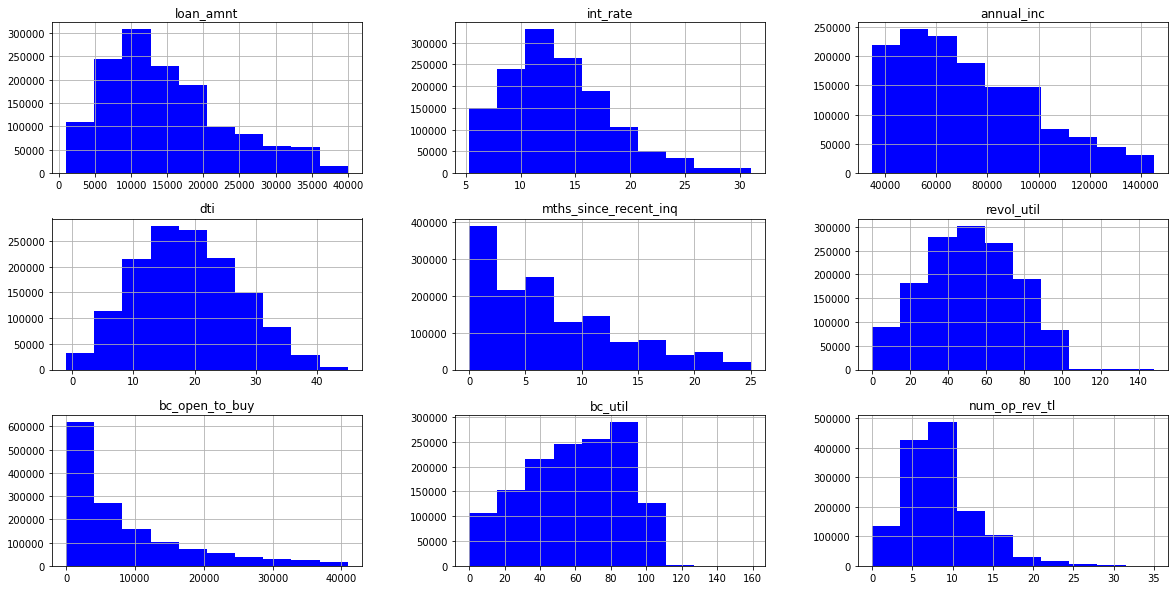

In [42]:
loans.hist(bins = 10, figsize = (20,10), color = 'b')

# Panda Profiling

In [43]:
# dropping passed columns
loans.drop(["bc_util", "bc_open_to_buy","int_rate"], axis = 1, inplace = True)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,num_op_rev_tl
0,3600,36 months,C4,leadman,10+ years,MORTGAGE,55000,Fully Paid,PA,6,4,30,4
2,20000,60 months,B4,truck driver,10+ years,MORTGAGE,63000,Fully Paid,IL,11,10,56,4
4,10400,60 months,F1,Contract Specialist,3 years,MORTGAGE,104433,Fully Paid,PA,25,1,64,7
7,20000,36 months,B1,road driver,10+ years,MORTGAGE,85000,Fully Paid,SC,18,8,6,3
8,10000,36 months,A2,SERVICE MANAGER,6 years,RENT,85000,Fully Paid,PA,13,1,34,13


# Categorcal features

In [44]:
cleaner_app_type = {"term": {" 36 months": 1.0, " 60 months": 2.0},
                    "sub_grade": {"A1": 1.0, "A2": 2.0, "A3": 3.0, "A4": 4.0, "A5": 5.0,
                                  "B1": 11.0, "B2": 12.0, "B3": 13.0, "B4": 14.0, "B5": 15.0,
                                  "C1": 21.0, "C2": 22.0, "C3": 23.0, "C4": 24.0, "C5": 25.0,
                                  "D1": 31.0, "D2": 32.0, "D3": 33.0, "D4": 34.0, "D5": 35.0,
                                  "E1": 41.0, "E2": 42.0, "E3": 43.0, "E4": 44.0, "E5": 45.0,
                                  "F1": 51.0, "F2": 52.0, "F3": 53.0, "F4": 54.0, "F5": 55.0,
                                  "G1": 61.0, "G2": 62.0, "G3": 63.0, "G4": 64.0, "G5": 65.0,
                                    },
                     "emp_length": {"< 1 year": 0.0, '1 year': 1.0, '2 years': 2.0, '3 years': 3.0, '4 years': 4.0, 
                                   '5 years': 5.0, '6 years': 6.0, '7 years': 7.0, '8 years': 8.0, '9 years': 9.0,
                                   '10+ years': 10.0 }
                   }
loans = loans.replace(cleaner_app_type)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391217 entries, 0 to 2260698
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   loan_amnt              1391217 non-null  float64
 1   term                   1391217 non-null  float64
 2   sub_grade              1391217 non-null  float64
 3   emp_title              1391217 non-null  object 
 4   emp_length             1391217 non-null  float64
 5   home_ownership         1391217 non-null  object 
 6   annual_inc             1391217 non-null  float64
 7   loan_status            1391217 non-null  object 
 8   addr_state             1391217 non-null  object 
 9   dti                    1391217 non-null  float64
 10  mths_since_recent_inq  1391217 non-null  float64
 11  revol_util             1391217 non-null  float64
 12  num_op_rev_tl          1391217 non-null  float64
dtypes: float64(9), object(4)
memory usage: 148.6+ MB


# Ordinal transofmraiton

In [45]:
loans['loan_status'].value_counts()

Fully Paid            672377
Current               520605
Charged Off           176077
Late (31-120 days)     13923
In Grace Period         5512
Late (16-30 days)       2701
Default                   22
Name: loan_status, dtype: int64

In [46]:
array = ['Charged Off', 'Fully Paid']
loans = loans.loc[loans['loan_status'].isin(array)]
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,addr_state,dti,mths_since_recent_inq,revol_util,num_op_rev_tl
0,3600,1,24,leadman,10,MORTGAGE,55000,Fully Paid,PA,6,4,30,4
2,20000,2,14,truck driver,10,MORTGAGE,63000,Fully Paid,IL,11,10,56,4
4,10400,2,51,Contract Specialist,3,MORTGAGE,104433,Fully Paid,PA,25,1,64,7
7,20000,1,11,road driver,10,MORTGAGE,85000,Fully Paid,SC,18,8,6,3
8,10000,1,2,SERVICE MANAGER,6,RENT,85000,Fully Paid,PA,13,1,34,13


In [47]:
cleaner_app_type1 = {"loan_status": { "Fully Paid": 1.0, "Charged Off": 0.0}}
loans = loans.replace(cleaner_app_type1)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848454 entries, 0 to 2260697
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              848454 non-null  float64
 1   term                   848454 non-null  float64
 2   sub_grade              848454 non-null  float64
 3   emp_title              848454 non-null  object 
 4   emp_length             848454 non-null  float64
 5   home_ownership         848454 non-null  object 
 6   annual_inc             848454 non-null  float64
 7   loan_status            848454 non-null  float64
 8   addr_state             848454 non-null  object 
 9   dti                    848454 non-null  float64
 10  mths_since_recent_inq  848454 non-null  float64
 11  revol_util             848454 non-null  float64
 12  num_op_rev_tl          848454 non-null  float64
dtypes: float64(10), object(3)
memory usage: 90.6+ MB


In [48]:
loans['loan_status'].value_counts()

1    672377
0    176077
Name: loan_status, dtype: int64

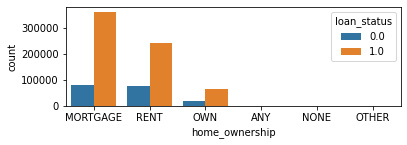

In [49]:
plt.subplot(2, 1, 1)
sns.countplot(x='home_ownership', data=loans, hue='loan_status')

In [50]:

analyse_home_ownership = loans.groupby(['home_ownership','loan_status'])['loan_status'].count()
analyse_home_ownership = analyse_home_ownership.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_home_ownership

home_ownership  loan_status
ANY             0             22
                1             78
MORTGAGE        0             18
                1             82
NONE            0             14
                1             86
OTHER           0             22
                1             78
OWN             0             21
                1             79
RENT            0             24
                1             76
Name: loan_status, dtype: float64

In [51]:
loans['emp_title'].nunique()

254467

In [52]:
emp_title_data = loan['emp_title'].value_counts()[:20]

In [53]:
loan_emp_title = loan.loc[loan['loan_status'] =='Fully Paid'] 
loan_emp_title.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600,3600,3600,36 months,14,123,C,C4,leadman,10+ years,MORTGAGE,55000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,6,0,Aug-2003,675,679,1,30,NaN,7,0,2765,30,13,w,0,0,4422,4422,3600,822,0,0,0,Jan-2019,123,NaN,Mar-2019,564,560,0,30,1,Individual,NaN,NaN,NaN,0,722,144904,2,2,0,1,21,4981,36,3,3,722,34,9300,3,1,4,4,20701,1506,37,0,0,148,128,3,3,1,4,69,4,69,2,2,4,2,5,3,4,9,4,7,0,0,0,3,77,0,0,0,178050,7746,2400,13734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700,24700,24700,36 months,12,820,C,C1,Engineer,10+ years,MORTGAGE,65000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16,1,Dec-1999,715,719,4,6,NaN,22,0,21470,19,38,w,0,0,25680,25680,24700,980,0,0,0,Jun-2016,926,NaN,Mar-2019,699,695,0,NaN,1,Individual,NaN,NaN,NaN,0,0,204396,1,1,0,1,19,18005,73,2,3,6472,29,111800,0,0,6,4,9733,57830,27,0,0,113,192,2,2,4,2,NaN,0,6,0,5,5,13,17,6,20,27,5,22,0,0,0,2,97,8,0,0,314017,39475,79300,24667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000,20000,20000,60 months,11,433,B,B4,truck driver,10+ years,MORTGAGE,63000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68341763,NaN,home_improvement,NaN,6

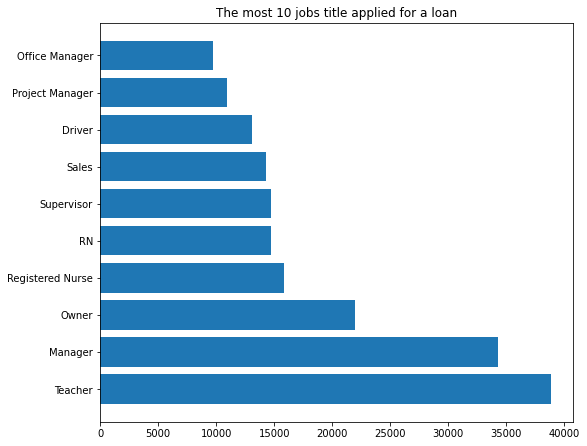

In [54]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 2)
plt.barh(loan_emp_title.emp_title.value_counts()[:10].index, loan.emp_title.value_counts()[:10])
plt.title("The most 10 jobs title applied for a loan")
plt.tight_layout()

# One hot encoding

In [55]:
#convert annual_inc to integer data type

loans = loans.astype({"home_ownership":'category', "addr_state":'category'})
loans.dtypes

loan_amnt                 float64
term                      float64
sub_grade                 float64
emp_title                  object
emp_length                float64
home_ownership           category
annual_inc                float64
loan_status               float64
addr_state               category
dti                       float64
mths_since_recent_inq     float64
revol_util                float64
num_op_rev_tl             float64
dtype: object

In [56]:
cat_columns = ["home_ownership", "addr_state"]
#create a new DataFrame for our processed data
loans = pd.get_dummies(loans, prefix_sep="__",
                              columns=cat_columns)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__NONE,home_ownership__OTHER,home_ownership__OWN,home_ownership__RENT,addr_state__AK,addr_state__AL,addr_state__AR,addr_state__AZ,addr_state__CA,addr_state__CO,addr_state__CT,addr_state__DC,addr_state__DE,addr_state__FL,addr_state__GA,addr_state__HI,addr_state__ID,addr_state__IL,addr_state__IN,addr_state__KS,addr_state__KY,addr_state__LA,addr_state__MA,addr_state__MD,addr_state__ME,addr_state__MI,addr_state__MN,addr_state__MO,addr_state__MS,addr_state__MT,addr_state__NC,addr_state__ND,addr_state__NE,addr_state__NH,addr_state__NJ,addr_state__NM,addr_state__NV,addr_state__NY,addr_state__OH,addr_state__OK,addr_state__OR,addr_state__PA,addr_state__RI,addr_state__SC,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,3600,1,24,leadman,10,55000,1,6,4,30,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,14,truck driver,10,63000,1,11,10,56,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10400,2,51,Contract Specialist,3,104433,1,25,1,64,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,20000,1,11,road driver,10,85000,1,18,8,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,10000,1,2,SERVICE MANAGER,6,85000,1,13,1,34,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.9 MB/s 


# Bi-Variate Analysis
'sub_grade' and 'loan_status'

In [58]:
analyse_sub_grade = loans.groupby(['sub_grade','loan_status'])['loan_status'].count()
analyse_sub_grade = analyse_sub_grade.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
analyse_sub_grade

sub_grade  loan_status
1          0              3
           1             97
2          0              4
           1             96
3          0              5
           1             95
4          0              7
           1             93
5          0              8
           1             92
11         0             10
           1             90
12         0             11
           1             89
13         0             13
           1             87
14         0             15
           1             85
15         0             16
           1             84
21         0             19
           1             81
22         0             21
           1             79
23         0             23
           1             77
24         0             25
           1             75
25         0             26
           1             74
31         0             28
           1             72
32         0             30
           1             70
33         0             

In [59]:
analyse_sub_grade = analyse_sub_grade.unstack()

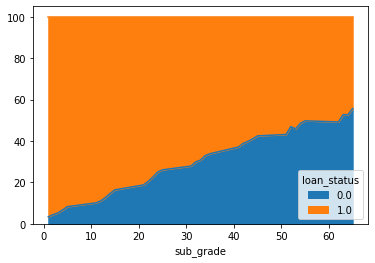

In [60]:
analyse_sub_grade.plot.area()

'annual_inc' vs 'loan_status'

In [61]:
bins = [30000, 50000, 70000, 90000, 110000, 130000, 150000]
labels = ['30-50k', '50-70k', '70-90k', '90-110k','110-130k','130-150k']
loans['binned'] = pd.cut(loans['annual_inc'], bins=bins, labels=labels)
loans.head()

,loan_amnt,term,sub_grade,emp_title,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__NONE,home_ownership__OTHER,home_ownership__OWN,home_ownership__RENT,addr_state__AK,addr_state__AL,addr_state__AR,addr_state__AZ,addr_state__CA,addr_state__CO,addr_state__CT,addr_state__DC,addr_state__DE,addr_state__FL,addr_state__GA,addr_state__HI,addr_state__ID,addr_state__IL,addr_state__IN,addr_state__KS,addr_state__KY,addr_state__LA,addr_state__MA,addr_state__MD,addr_state__ME,addr_state__MI,addr_state__MN,addr_state__MO,addr_state__MS,addr_state__MT,addr_state__NC,addr_state__ND,addr_state__NE,addr_state__NH,addr_state__NJ,addr_state__NM,addr_state__NV,addr_state__NY,addr_state__OH,addr_state__OK,addr_state__OR,addr_state__PA,addr_state__RI,addr_state__SC,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY,binned
0,3600,1,24,leadman,10,55000,1,6,4,30,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,50-70k
2,20000,2,14,truck driver,10,63000,1,11,10,56,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50-70k
4,10400,2,51,Contract Specialist,3,104433,1,25,1,64,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,90-110k
7,20000,1,11,road driver,10,85000,1,18,8,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,70-90k
8,10000,1,2,SERVICE MANAGER,6,85000,1,13,1,34,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,70-90k


In [62]:
analyse_income = loans.groupby(['binned','loan_status'])['loan_status'].count()
analyse_income

binned    loan_status
30-50k    0               47203
          1              157142
50-70k    0               57145
          1              206988
70-90k    0               37432
          1              150798
90-110k   0               20291
          1               90670
110-130k  0               10753
          1               50254
130-150k  0                3253
          1               16525
Name: loan_status, dtype: int64

In [63]:
analyse_income = analyse_income.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_income

binned    loan_status
30-50k    0             23
          1             77
50-70k    0             22
          1             78
70-90k    0             20
          1             80
90-110k   0             18
          1             82
110-130k  0             18
          1             82
130-150k  0             16
          1             84
Name: loan_status, dtype: float64

In [64]:
analyse_income = analyse_income.unstack()
analyse_income

loan_status,0,1
binned,,
30-50k,23,77
50-70k,22,78
70-90k,20,80
90-110k,18,82
110-130k,18,82
130-150k,16,84


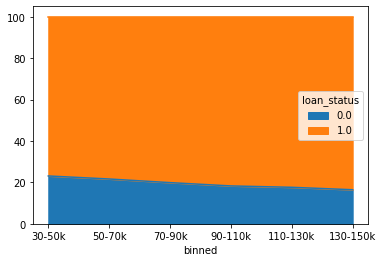

In [65]:
analyse_income.plot.area()

'emp_length' vs 'loan_status'

In [66]:
analyse_emp_length = loans.groupby(['emp_length','loan_status'])['loan_status'].count()
analyse_emp_length = analyse_emp_length.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_emp_length

emp_length  loan_status
0           0             22
            1             78
1           0             22
            1             78
2           0             21
            1             79
3           0             21
            1             79
4           0             21
            1             79
5           0             21
            1             79
6           0             21
            1             79
7           0             21
            1             79
8           0             21
            1             79
9           0             21
            1             79
10          0             20
            1             80
Name: loan_status, dtype: float64

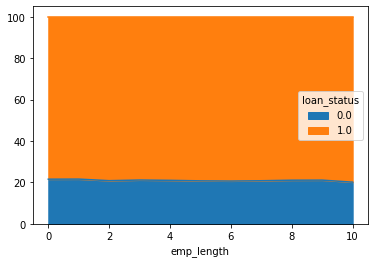

In [67]:
analyse_emp_length = analyse_emp_length.unstack()
analyse_emp_length.plot.area()

'dti' vs 'loan_status'

In [68]:

analyse_dti = loans.groupby(['dti','loan_status'])['loan_status'].count()
loans['dti'].unique()

array([ 5.91, 10.78, 25.37, ..., 44.45, 41.76, 42.52])

In [69]:
binsdti = [1, 10, 20, 30, 40, 50]
labelsdti = ['1-10', '10-20', '20-30','30-40','40-50']
loans['binneddti'] = pd.cut(loans['dti'], bins=binsdti, labels=labelsdti)


analyse_dti = loans.groupby(['binneddti','loan_status'])['loan_status'].count()
analyse_dti = analyse_dti.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

analyse_dti

binneddti  loan_status
1-10       0             16
           1             84
10-20      0             18
           1             82
20-30      0             24
           1             76
30-40      0             30
           1             70
40-50      0             31
           1             69
Name: loan_status, dtype: float64

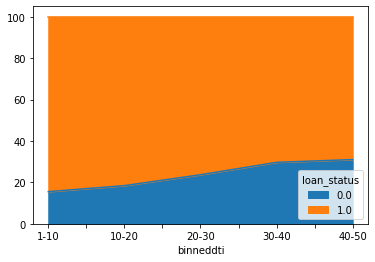

In [70]:
analyse_dti = analyse_dti.unstack()
analyse_dti.plot.area()

# Train/Test Split

In [71]:
loans.drop(["emp_title", "binned","binneddti"], axis = 1, inplace = True)

In [72]:
X = loans.drop('loan_status', axis=1)
y = loans[['loan_status']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [73]:
loans.head()

,loan_amnt,term,sub_grade,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,home_ownership__ANY,home_ownership__MORTGAGE,home_ownership__NONE,home_ownership__OTHER,home_ownership__OWN,home_ownership__RENT,addr_state__AK,addr_state__AL,addr_state__AR,addr_state__AZ,addr_state__CA,addr_state__CO,addr_state__CT,addr_state__DC,addr_state__DE,addr_state__FL,addr_state__GA,addr_state__HI,addr_state__ID,addr_state__IL,addr_state__IN,addr_state__KS,addr_state__KY,addr_state__LA,addr_state__MA,addr_state__MD,addr_state__ME,addr_state__MI,addr_state__MN,addr_state__MO,addr_state__MS,addr_state__MT,addr_state__NC,addr_state__ND,addr_state__NE,addr_state__NH,addr_state__NJ,addr_state__NM,addr_state__NV,addr_state__NY,addr_state__OH,addr_state__OK,addr_state__OR,addr_state__PA,addr_state__RI,addr_state__SC,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,3600,1,24,10,55000,1,6,4,30,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,2,14,10,63000,1,11,10,56,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10400,2,51,3,104433,1,25,1,64,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,20000,1,11,10,85000,1,18,8,6,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,10000,1,2,6,85000,1,13,1,34,13,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# Normalizing the Data

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [76]:
X_train.shape

(636340, 65)

In [77]:
model = Sequential()
model.add(Dense(68, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(34, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(197, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

#complie model
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')

In [78]:
model.fit(X_train, y_train,
         epochs=25,
         batch_size=256,
         validation_data=(X_test, y_test))

Epoch 1/25
2486/2486 [==============================] - 25s 9ms/step - loss: 0.4716 - val_loss: 0.4641
Epoch 2/25
2486/2486 [==============================] - 17s 7ms/step - loss: 0.4666 - val_loss: 0.4648
Epoch 3/25
2486/2486 [==============================] - 15s 6ms/step - loss: 0.4656 - val_loss: 0.4636
Epoch 4/25
2486/2486 [==============================] - 17s 7ms/step - loss: 0.4653 - val_loss: 0.4634
Epoch 5/25
2486/2486 [==============================] - 15s 6ms/step - loss: 0.4649 - val_loss: 0.4630
Epoch 6/25
2486/2486 [==============================] - 15s 6ms/step - loss: 0.4646 - val_loss: 0.4633
Epoch 7/25
2486/2486 [==============================] - 15s 6ms/step - loss: 0.4643 - val_loss: 0.4652
Epoch 8/25
2486/2486 [==============================] - 16s 6ms/step - loss: 0.4640 - val_loss: 0.4633
Epoch 9/25
2486/2486 [==============================] - 15s 6ms/step - loss: 0.4638 - val_loss: 0.4633
Epoch 10/25
2486/2486 [==============================] - 18s 7ms/step - l

# Evaluating Model Performance

<Figure size 864x576 with 0 Axes>

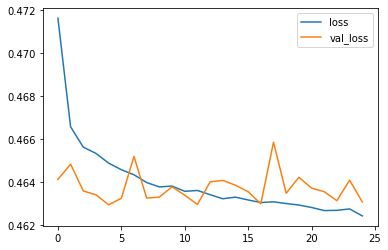

In [79]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,8))
losses.plot()

In [80]:
from sklearn import metrics

In [81]:
predicts = (model.predict(X_test) > 0.5).astype("int32")

In [82]:
predicts

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

In [83]:
print(metrics.confusion_matrix(y_test, predicts))
print(metrics.classification_report(y_test, predicts))

[[  1470  42549]
 [  1045 167050]]
              precision    recall  f1-score   support

         0.0       0.58      0.03      0.06     44019
         1.0       0.80      0.99      0.88    168095

    accuracy                           0.79    212114
   macro avg       0.69      0.51      0.47    212114
weighted avg       0.75      0.79      0.71    212114



# Logistic Regression Model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [85]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


[[  4230  39789]
 [  3904 164191]]


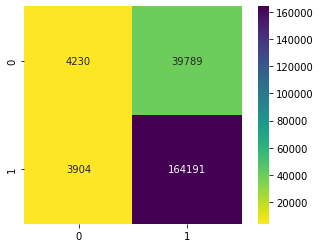

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

ax = sns.heatmap(confusion_matrix, cmap='viridis_r', annot=True, fmt='d', square=True)

# Model Pipelining 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

 Pipelines Creation
 1. Data Preprocessing by using Standard Scaler
 2. Reduce Dimension using PCA
 3. Apply  Classifier

In [88]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [89]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [90]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [91]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [92]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [93]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [94]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.792644521342297
Decision Tree Test Accuracy: 0.6947914800531789
RandomForest Test Accuracy: 0.7647444298820446
